In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn.metrics import confusion_matrix

df = pd.read_csv(".\\dataset\\Consolidated_CancerSEEK_Data.csv", low_memory = False)
array = df.values

In [6]:
# tumor types
np.unique(array[:, 5], return_index=False, return_inverse=False, return_counts=False, axis=None)

array(['Breast', 'Colorectum', 'Esophagus', 'Liver', 'Lung', 'Normal',
       'Ovary', 'Pancreas', 'Stomach'], dtype=object)

In [7]:
cancerTypes = ['Breast', 'Colorectum', 'Esophagus', 'Liver', 'Lung', 'Normal',
       'Ovary', 'Pancreas', 'Stomach'] 
cancerTypeCases = []

# cases for each cancer type
for i in range(len(cancerTypes)):
    cancerTypeCases.append(array[:, 5][array[:, 5] == cancerTypes[i]].shape[0])
    print(cancerTypes[i] + " cancer cases: " + str(cancerTypeCases[i]))

# note 'normal cancer' are control patients

Breast cancer cases: 209
Colorectum cancer cases: 388
Esophagus cancer cases: 45
Liver cancer cases: 44
Lung cancer cases: 104
Normal cancer cases: 812
Ovary cancer cases: 54
Pancreas cancer cases: 93
Stomach cancer cases: 68


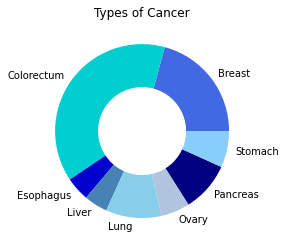

In [8]:
names = ['Breast', 'Colorectum', 'Esophagus', 'Liver', 'Lung', 'Ovary', 'Pancreas', 'Stomach'] 
size = [209, 388, 45, 44, 104, 54, 93, 68]
 
my_circle = plt.Circle( (0,0), 0.5, color='white')

plt.pie(size, labels=names, colors=['royalblue', 'darkturquoise', 'mediumblue', 
                                    'steelblue', 'skyblue', 'lightsteelblue', 'navy', 'lightskyblue'])

# pie chart of cancer types
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Types of Cancer")
plt.show()

In [9]:
# stage types
np.unique(array[1:, 6], return_index=False, return_inverse=False, return_counts=False, axis=None)

array(['0', 'I', 'II', 'III'], dtype=object)

In [10]:
stageTypes = ['0', 'I', 'II', 'III']
stageTypeCases = []

for i in range(len(stageTypes)):
    stageTypeCases.append(array[1:, 6][array[1:, 6] == stageTypes[i]].shape[0])
    print("Stage " + stageTypes[i] + " cancer cases: " + str(stageTypeCases[i]))

Stage 0 cancer cases: 812
Stage I cancer cases: 199
Stage II cancer cases: 496
Stage III cancer cases: 309


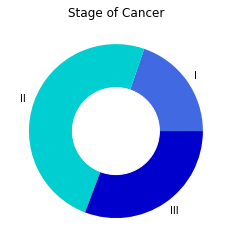

In [11]:
names = ['I', 'II', 'III'] 
size = [198, 497, 309]
 
my_circle = plt.Circle( (0,0), 0.5, color='white')

plt.pie(size, labels=names, colors=['royalblue', 'darkturquoise', 'mediumblue'])

# pie charts of stage types
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Stage of Cancer")
plt.show()

In [9]:
# distribution of control and cancer patients    
cancerPatient = 0
controlPatient = 0
totalCases = 1817.
for value in array[:, 49]:
    if value == 1:
        cancerPatient += 1
    else:
        controlPatient += 1
        
print("Total number of cancer patients: " + str(cancerPatient))
print("Total number of healthy patients: " + str(controlPatient))

Total number of cancer patients: 1005
Total number of healthy patients: 812


In [10]:
tpr = 0
tnr = 0
fpr = 0
fnr = 0

predAndActual = array[:, 48:]

# counting tpr, tnr, fpr, fnr cases
for i in range(len(predAndActual)):
    if predAndActual[i,0] == 0:
        if predAndActual[i,0] == predAndActual[i,1]:
            tnr += 1
        else:
            fnr += 1
    else:
        if predAndActual[i,0] == predAndActual[i,1]:
            tpr += 1
        else:
            fpr += 1

print("Number of true positives: " + str(tpr))
print("Number of true negatives: " + str(tnr))
print("Number of false positives: " + str(fpr))
print("Number of false negatives: " + str(fnr))

Number of true positives: 626
Number of true negatives: 805
Number of false positives: 7
Number of false negatives: 379


In [11]:
# creating confusion matrix 
cf_matrix = np.zeros((2, 2))
cf_matrix[0,0] = 805
cf_matrix[0,1] = 7
cf_matrix[1,0] = 379
cf_matrix[1,1] = 626
print(cf_matrix)

[[805.   7.]
 [379. 626.]]


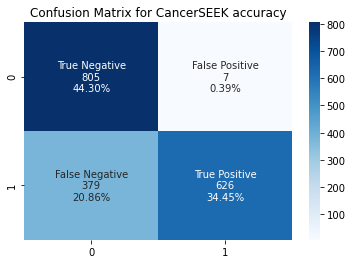

In [12]:
# plotting confusion matrix
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = plt.axes()
sns.heatmap(cf_matrix, annot=labels, fmt = '', cmap='Blues', ax = ax)
ax.set_title('Confusion Matrix for CancerSEEK accuracy')
plt.show()

In [12]:
# initializing variables to count fnr or tpr / stage types
tpr = 0
tnr = 0
fpr = 0
fnr = 0
count11 = 0
count12 = 0
count13 = 0
count21 = 0
count22 = 0
count23 = 0

predAndActual = array[:, 48:]

for i in range(len(predAndActual)):
    if predAndActual[i,0] == 0:
        if predAndActual[i,0] == predAndActual[i,1]:
            tnr += 1
        else:
            fnr += 1
            if array[i,6] == 'I':
                count11 += 1
            elif array[i,6] == 'II':
                count12 += 1
            elif array[i,6] == 'III':
                count13 += 1    
                
            
    else:
        if predAndActual[i,0] == predAndActual[i,1]:
            tpr += 1
            if array[i,6] == 'I':
                count21 += 1
            elif array[i,6] == 'II':
                count22 += 1
            elif array[i,6] == 'III':
                count23 += 1
        else:
            fpr += 1   

print("False negatives")
print("Stage 1: " + str(count11))
print("Stage 2: " + str(count12))
print("Stage 3: " + str(count13))
print("True positives")
print("Stage 1: " + str(count21))
print("Stage 2: " + str(count22))
print("Stage 3: " + str(count23))

False negatives
Stage 1: 104
Stage 2: 183
Stage 3: 92
True positives
Stage 1: 95
Stage 2: 314
Stage 3: 217


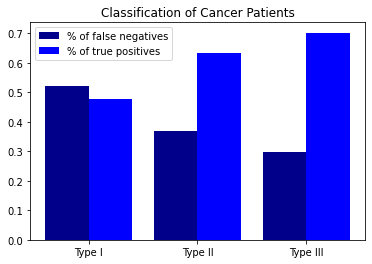

In [13]:
X = ['Type I','Type II','Type III']
fnr = [104/(104+95), 183/(183+314), 92/(92+217)]
tpr = [95/(104+95), 314/(183+314), 217/(92+217)]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, fnr, 0.4, label = '% of false negatives', color = 'darkblue')
plt.bar(X_axis + 0.2, tpr, 0.4, label = '% of true positives', color = 'blue')
  
plt.xticks(X_axis, X)
plt.title("Classification of Cancer Patients")
plt.legend()
plt.show()

In [14]:
# correlation matrix
matrix = df.corr().values
print(matrix[39])

[ 0.0646625   0.04855459  0.09919444  0.11849017  0.29550324  0.29771322
  0.13785785  0.08067083  0.08111301  0.16246878  0.09365958  0.22640474
  0.11516526  0.1165134   0.05734903  0.04645136  0.00755716  0.06321508
  0.26139985  0.07841307  0.17212932  0.12502047  0.03995033 -0.02502001
  0.0070016   0.03263681  0.04194603  0.08774287  0.05909341  0.11755356
  0.29210655  0.31843259 -0.01051092  0.07365816  0.09784979  0.04526859
  0.34785588  0.28459937  0.02329705  1.          0.39102248  0.10984799
  0.17306815  0.17769974  0.11582161]


<AxesSubplot:>

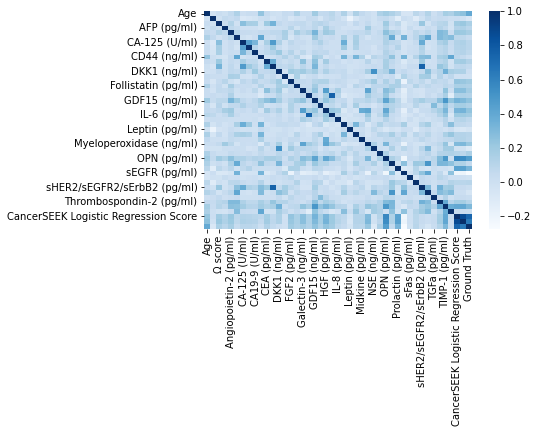

In [15]:
# plotting correlation matrix
sns.heatmap(df.corr(), cmap="Blues")